In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
iris_data=pd.read_csv("iris.csv")
iris_data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [3]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [5]:
iris_data


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
iris_data['species']=iris_data['Species'].apply(str).str.replace('Iris-','')

In [7]:
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa,setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa,setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa,setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa,setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa,setosa
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica,virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica,virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica,virginica


In [8]:
iris_data['Species']=iris_data['Species'].apply(str).str.replace('setosa','0')
     

iris_data['Species']=iris_data['Species'].apply(str).str.replace('versicolor','1')
     

iris_data['Species']=iris_data['Species'].apply(str).str.replace('virginica','2')
     

iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species
0,1,5.1,3.5,1.4,0.2,Iris-0,setosa
1,2,4.9,3.0,1.4,0.2,Iris-0,setosa
2,3,4.7,3.2,1.3,0.2,Iris-0,setosa
3,4,4.6,3.1,1.5,0.2,Iris-0,setosa
4,5,5.0,3.6,1.4,0.2,Iris-0,setosa
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-2,virginica
146,147,6.3,2.5,5.0,1.9,Iris-2,virginica
147,148,6.5,3.0,5.2,2.0,Iris-2,virginica
148,149,6.2,3.4,5.4,2.3,Iris-2,virginica


In [9]:
iris_data.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
145,False,False,False,False,False,False,False
146,False,False,False,False,False,False,False
147,False,False,False,False,False,False,False
148,False,False,False,False,False,False,False


In [10]:
iris_data.isnull().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
species          0
dtype: int64

#### Data Visualization

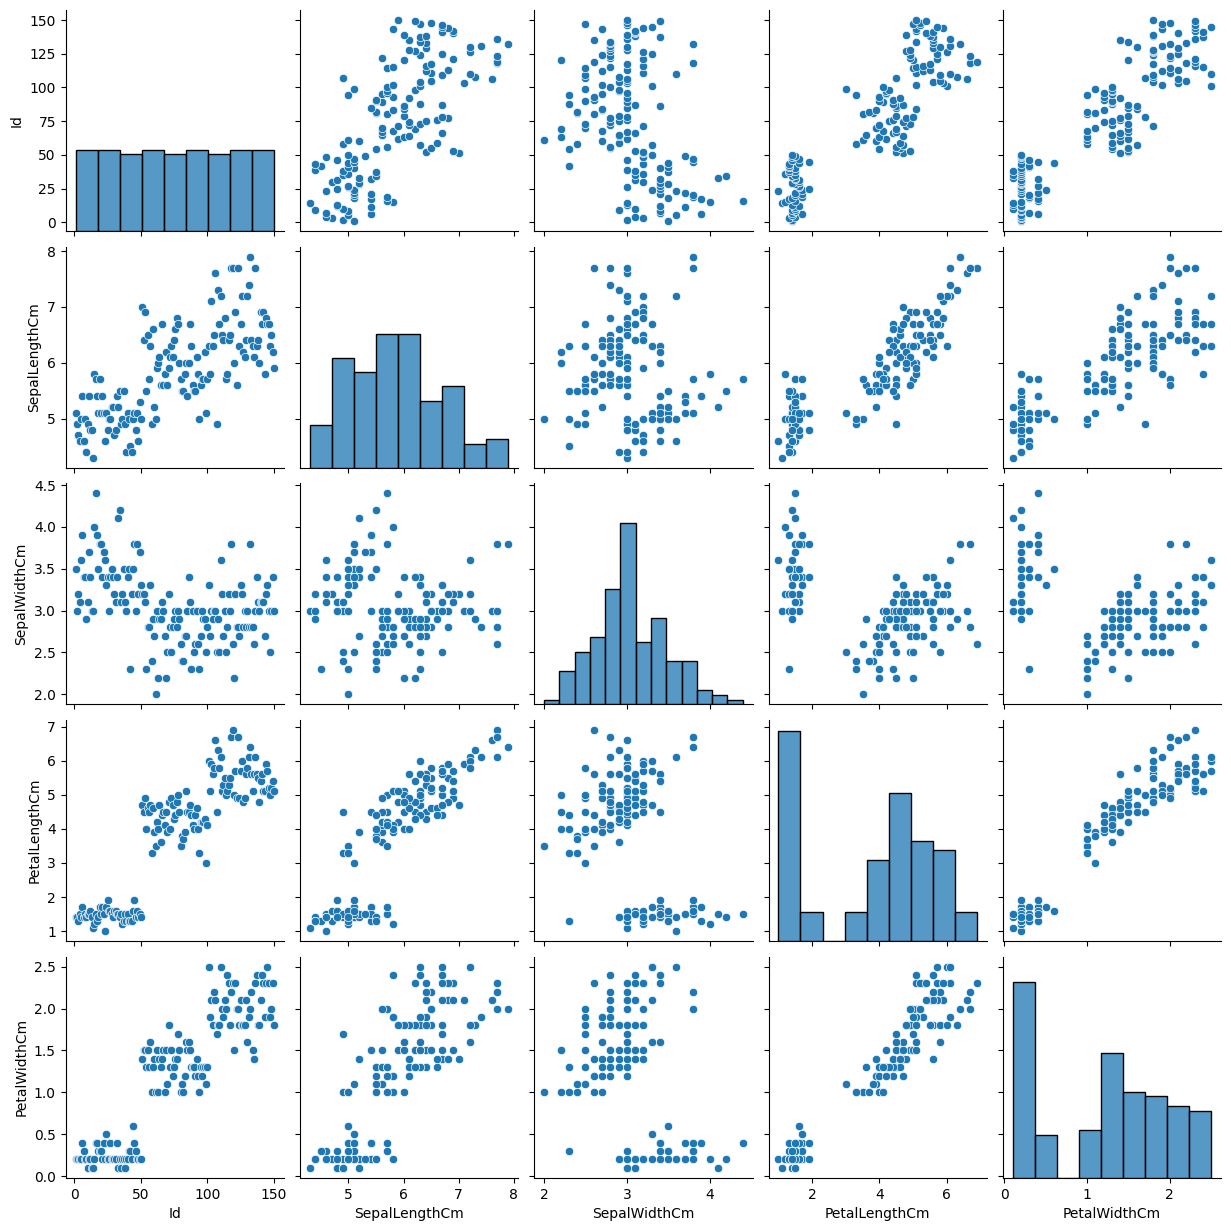

In [11]:
sns.pairplot(iris_data)


C:\Users\asima\AppData\Local\Temp\ipykernel_2076\3511246364.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iris_data.SepalLengthCm,ax=ax[0])
C:\Users\asima\AppData\Local\Temp\ipykernel_2076\3511246364.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iris_data.SepalWidthCm,ax=ax[1])
C:\Us

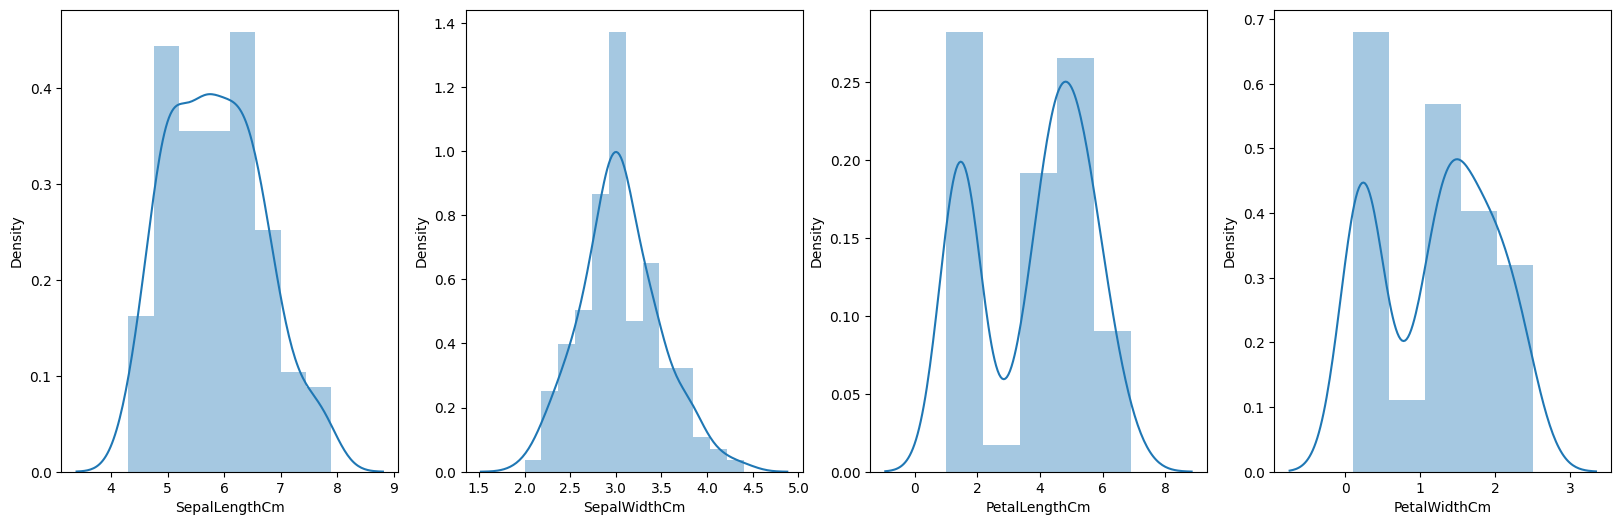

In [12]:
fig, ax =plt.subplots(1,4,figsize=(20,6))


sns.distplot(iris_data.SepalLengthCm,ax=ax[0])
sns.distplot(iris_data.SepalWidthCm,ax=ax[1])
sns.distplot(iris_data.PetalLengthCm,ax=ax[2])
sns.distplot(iris_data.PetalWidthCm,ax=ax[3])

fig.show()

<Axes: xlabel='species', ylabel='SepalLengthCm'>

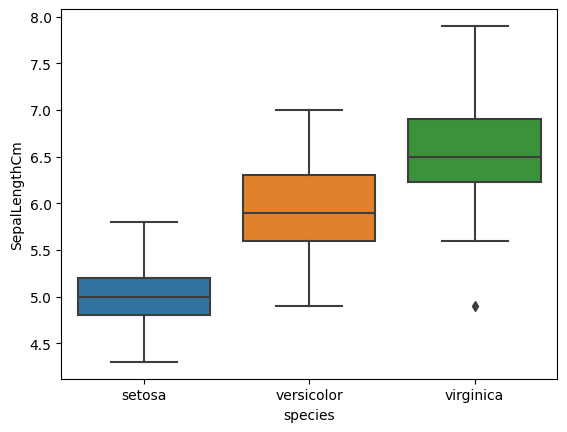

In [13]:
sns.boxplot(x="species", y="SepalLengthCm", data=iris_data)

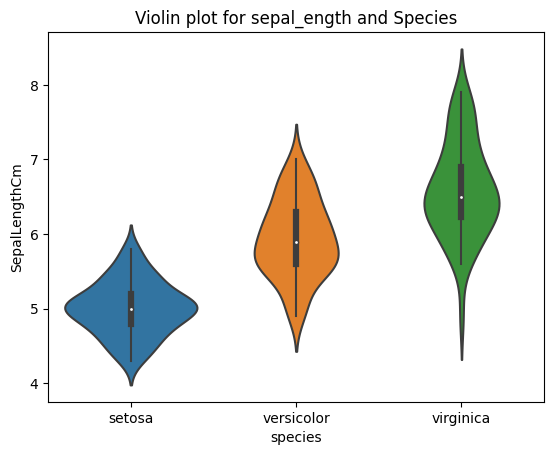

In [14]:
sns.violinplot(x="species", y="SepalLengthCm", data=iris_data)
plt.title("Violin plot for sepal_ength and Species")
plt.show()

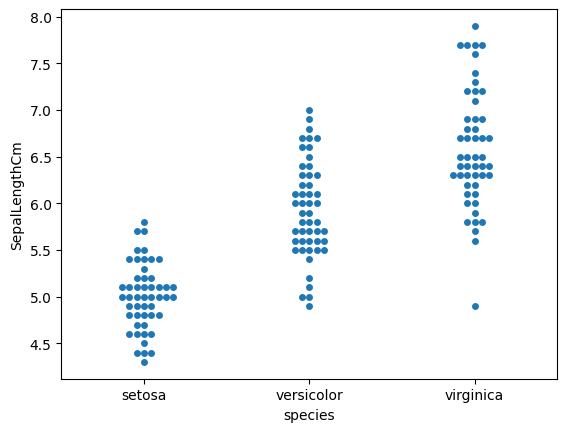

In [15]:
ax = sns.swarmplot(x="species", y="SepalLengthCm", data=iris_data)

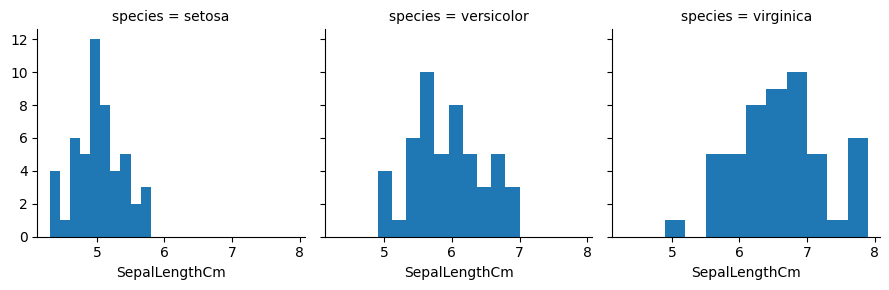

In [16]:
g = sns.FacetGrid(iris_data, col="species")
g.map(plt.hist, "SepalLengthCm");

In [17]:
predictor = iris_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
target = iris_data.Species

x_train, x_test, y_train, y_test = train_test_split(predictor, target, test_size=0.2)

#### K-NEIGHBORS CLASSIFIER

In [18]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
y_predict = neigh.predict(x_test)

In [20]:
predictions=neigh.predict(x_test)

In [21]:
accuracy_score(y_test,predictions)

0.9333333333333333

#### LOGISTIC REGRESSION

In [22]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [23]:
predictions=logmodel.predict(x_test)

In [24]:
accuracy_score(y_test,predictions)

0.9333333333333333

#### DECISION CLASSIFIER

In [25]:
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
clf.fit(x_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9333333333333333
